<a href="https://colab.research.google.com/github/Jatingpt/NYC-TAXI-Trip-Duration-Regression-/blob/main/Copy_of_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

## **Approach used:**

The approach we have used in this project is defined in the given format-

1) **Loading our data :** In this section we just loaded our dataset in colab notebook and read the csv file.


2) **Data Cleaning and Processing :** In this section we have tried to remove the null values and for some of the columns we have replaced the null values with the appropriate values with reasonable assumptions.

3) **Analysis and Visualization :** In this section we have tried to explore all variables which can play an important role for the analysis. In the next parts we have tried to explore the effect of one over the other. In the next part we tried to answers our hypothetical questions.

# **What is EDA?** 

 **EDA** stands for **“Exploratory Data Analysis “** EDA is applied to **investigate** the data and **summarize** the key **insights**.
It will give you the basic understanding of your data, it’s **distribution**, null values and much more.
You can either explore data using graphs or through some **python functions**. EDA can be done using statistical and visualization techniques.

The following steps are involved in the **process of EDA:**

* **Acquire and loading data**
* **Understanding the variables**
* **Cleaning dataset**
* **Exploring and Visualizing Data**
* **Analyzing relationships between variables**

#**Importing Necessary Libraries.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.ensemble import ExtraTreesRegressor

#**Loading the Data.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
file_path ='/content/drive/MyDrive/Capstone project-2/NYC Taxi Data (1).csv'
df = pd.read_csv(file_path)
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
df.shape

(1458644, 11)

We can see that the Data has 1458644 and 11 features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

* We have id, pickup_datetime, dropoff_datetime, and store_and_fwd_flag of the type ‘object’.
* vendor_id, passenger_count, and trip_duration are of type int.
* pickup_longitude, pickup_latitude, dropoff_longitude, and dropoff_latitude are of type float.
 

#**Target Variable - Duration of the trip in seconds.**

Checking Null Values.

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

* We see that id has 1458644 unique values which are equal to the number of rows in our dataset.
* There are 2 unique vendor ids.
* There are 10 unique passenger counts.
* There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


* Here we can see that the minimum trip duration is 1 second which is not making any sense.
* The maximum number of passenger in this trip is '9' and minimum number of passenger is '0' and data of '0' passanger is not making any sense here.
*The maximum duration of this trip is 3526282 seconds which is around 980 hours and it can be behave as an outliers in the model. 

**Droping outliers.**

In [ ]:
df.drop(df[df['trip_duration'] == 1939736].index, inplace = True)
df.drop(df[df['trip_duration'] <= 0].index, inplace = True)
df.drop(df[df['passenger_count'] == 0].index, inplace = True)
df.drop(['id'], axis = 1, inplace = True)

In [ ]:
df.shape

(1458583, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458583 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458583 non-null  int64  
 1   pickup_datetime     1458583 non-null  object 
 2   dropoff_datetime    1458583 non-null  object 
 3   passenger_count     1458583 non-null  int64  
 4   pickup_longitude    1458583 non-null  float64
 5   pickup_latitude     1458583 non-null  float64
 6   dropoff_longitude   1458583 non-null  float64
 7   dropoff_latitude    1458583 non-null  float64
 8   store_and_fwd_flag  1458583 non-null  object 
 9   trip_duration       1458583 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


**Converting pickup_datetime and dropoff_datetime object into datetime object.**

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458583 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458583 non-null  int64         
 1   pickup_datetime     1458583 non-null  datetime64[ns]
 2   dropoff_datetime    1458583 non-null  datetime64[ns]
 3   passenger_count     1458583 non-null  int64         
 4   pickup_longitude    1458583 non-null  float64       
 5   pickup_latitude     1458583 non-null  float64       
 6   dropoff_longitude   1458583 non-null  float64       
 7   dropoff_latitude    1458583 non-null  float64       
 8   store_and_fwd_flag  1458583 non-null  object        
 9   trip_duration       1458583 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 122.4+ MB


In [ ]:
df.head(2)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [ ]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

We have to focus on trip duration so the trip duration is the duration between pickup datetime and drop datetime. For getting trip duration i will be subtracting drop datetime to pickup date time for getting trip duration.

In [ ]:
df['trip_duration'] = df['pickup_datetime'] - df['dropoff_datetime']

In [ ]:
df.head(2)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,-1 days +23:52:25
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,-1 days +23:48:57


As now we have the trip duration so, i am dropping pickup datetime and drop datetime.

In [ ]:
df.drop(['pickup_datetime'], axis = 1, inplace = True)

In [ ]:
df.drop(['dropoff_datetime'], axis = 1, inplace = True)

In [ ]:
df.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,-1 days +23:52:25
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,-1 days +23:48:57


#**Converting categorical feature to one hot encoding by creating dummies means different dtypes to int type.**

In [ ]:
df.loc[df['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 0
df.loc[df['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 1

In [ ]:
df.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,-1 days +23:52:25
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,-1 days +23:48:57


In [ ]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize = (20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

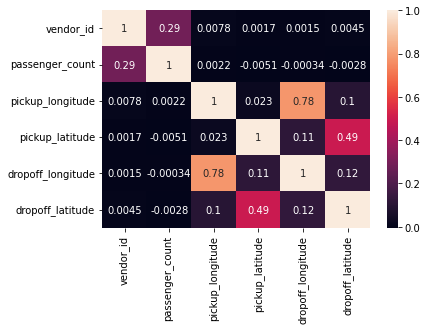

In [ ]:
g = sns.heatmap(df[top_corr_features].corr(), annot = True)

Wen can see that pickup_longitude and dropup_longitude are highly correlated.

#**Independent and Dependent features**

In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0


In [ ]:
y.head()

0   -1 days +23:52:25
1   -1 days +23:48:57
2   -1 days +23:24:36
3   -1 days +23:52:51
4   -1 days +23:52:45
Name: trip_duration, dtype: timedelta64[ns]

In [ ]:
df.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,-1 days +23:52:25
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,-1 days +23:48:57


In [ ]:
df.head(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,-1 days +23:52:25
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,-1 days +23:48:57


In [ ]:
df = df[df['passenger_count']>0]
df = df[df['passenger_count']<9]

In [ ]:
df = df[df['pickup_longitude'] <= -73.75]
df = df[df['pickup_longitude'] >= -74.03]
df = df[df['pickup_latitude'] <= 40.85]
df = df[df['pickup_latitude'] >= 40.63]
df = df[df['dropoff_longitude'] <= -73.75]
df = df[df['dropoff_longitude'] >= -74.03]
df = df[df['dropoff_latitude'] <= 40.85]
df = df[df['dropoff_latitude'] >= 40.63]

In [ ]:
trip_duration_mean = np.mean(df['trip_duration'])
trip_duration_std = np.std(df['trip_duration'])
train_data = df[df['trip_duration']<=trip_duration_mean + 2*trip_duration_std]
train_data = df[df['trip_duration']>= trip_duration_mean - 2*trip_duration_std]

#**Next, I will plot the pickup and drop off points of each taxi ride.**

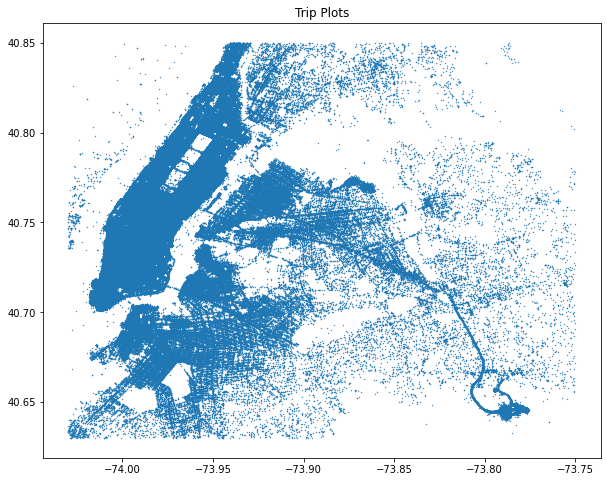

In [ ]:
longitude = list(df.pickup_longitude) + list(df.dropoff_longitude)
latitude = list(df.pickup_latitude) + list(df.dropoff_latitude)
plt.figure(figsize = (10,8))
plt.plot(longitude,latitude,'.', alpha = 1, markersize = .8 )
plt.title('Trip Plots')
plt.show()

Based on different coordinate estimates of New York City, the latitude and longitude ranges are as follows:

Latitude is between 40.7128 and 40.748817
Longitude is between - 74.0059 and - 73.968285



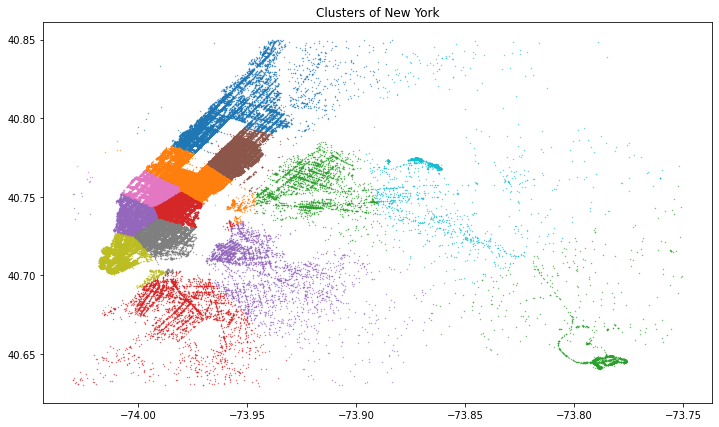

In [ ]:
# Create data frame of coordinates
loc_df = pd.DataFrame()
loc_df['longitude'] = longitude
loc_df['latitude'] = latitude

# Clusters of New York
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=2, n_init = 10).fit(loc_df)
loc_df['label'] = kmeans.labels_
loc_df = loc_df.sample(200000)
plt.figure(figsize = (12,7))
for label in loc_df.label.unique():
    plt.plot(loc_df.longitude[loc_df.label == label],loc_df.latitude[loc_df.label == label],'.', alpha = 0.8, markersize = 0.8)
plt.title('Clusters of New York')
plt.show()

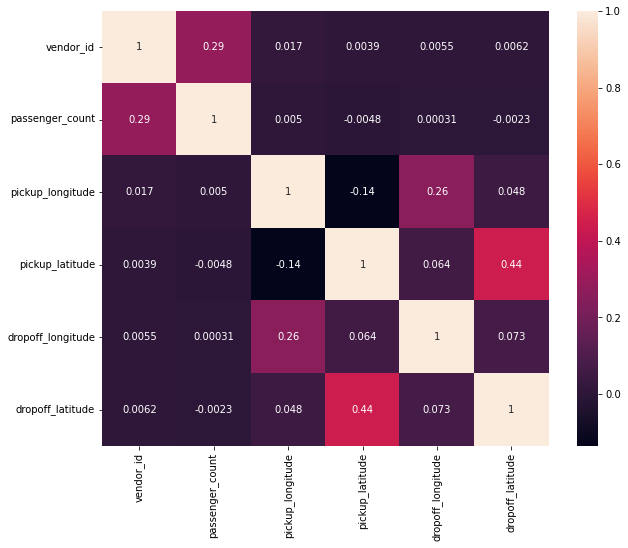

In [ ]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize = (10,8))
g = sns.heatmap(df[top_corr_features].corr(), annot = True)

In [ ]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
x = df[['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration']]
y = df['trip_duration']       

#**Applying Train_Test Split.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Now implementing Linear Regression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#model object
lin_reg = LinearRegression()

In [ ]:
#Fit to training data
lin_reg.fit(x_train,y_train)
print(lin_reg)

In [ ]:
#predicting
y_pred_lin_reg = lin_reg.predict(x_test)

In [ ]:
#Score it
from sklearn import metrics

In [ ]:
df.info()

In [ ]:
df['trip_durationn'] = df['trip_duration'] / pd.Timedelta(minutes=1)

In [ ]:
df.drop(['trip_duration'], axis = 1, inplace = True)

In [ ]:
df.drop(['minutes'], axis = 1, inplace = True)

In [ ]:
df.info()